<a href="https://colab.research.google.com/github/AliAqdas-repo/wsi-scanner-segmentation/blob/main/ImageSlicingAndLoadingSlides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Commented

In [ ]:
import torch
import torchvision
import PIL
import cv2 as cv
import requests

In [ ]:
!pip install image_slicer

     |████████████████████████████████| 2.2 MB 8.7 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
from image_slicer import slice

In [ ]:
response = requests.get("https://cdn.wallpapersafari.com/94/45/CVxMGi.jpg")

file = open("/content/sample_image.jpg", "wb")
file.write(response.content)
file.close()

In [ ]:
img=cv.imread("/content/sample_image.jpg")

In [ ]:
img=cv.imread("/content/01-2461G-labels2.png‎")

In [ ]:
imgTile=cv.imread("/content/_01_01.png")
imgTile.shape

(432, 819, 3)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

#Slice and Displaying Sliced Images

In [ ]:
tiles=slice("/content/01-2461G-labels2.png",1225)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from PIL import ImageDraw,ImageFont
import image_slicer

In [ ]:
for tile in tiles:
  overlay=ImageDraw.Draw(tile.image)  
  overlay.text((5, 5), str(tile.number), (255, 255, 255),
                 ImageFont.load_default())
image_slicer.save_tiles(tiles,format='jpeg')

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
print(f'_0{i}_0{j}.jpg')

_04_04.jpg


In [ ]:
im=np.empty((5,5,432,819,3),dtype='uint8')
#im=np.empty((5,5,819,432,3))

for i in range(1,6):
  for j in range(1,6):
    im[i-1,j-1]=plt.imread(f'_0{i}_0{j}.jpg')

In [ ]:
im_tensor=torch.tensor(im.transpose(0,3,1,2))

In [ ]:
cv2_imshow(im[4][2])

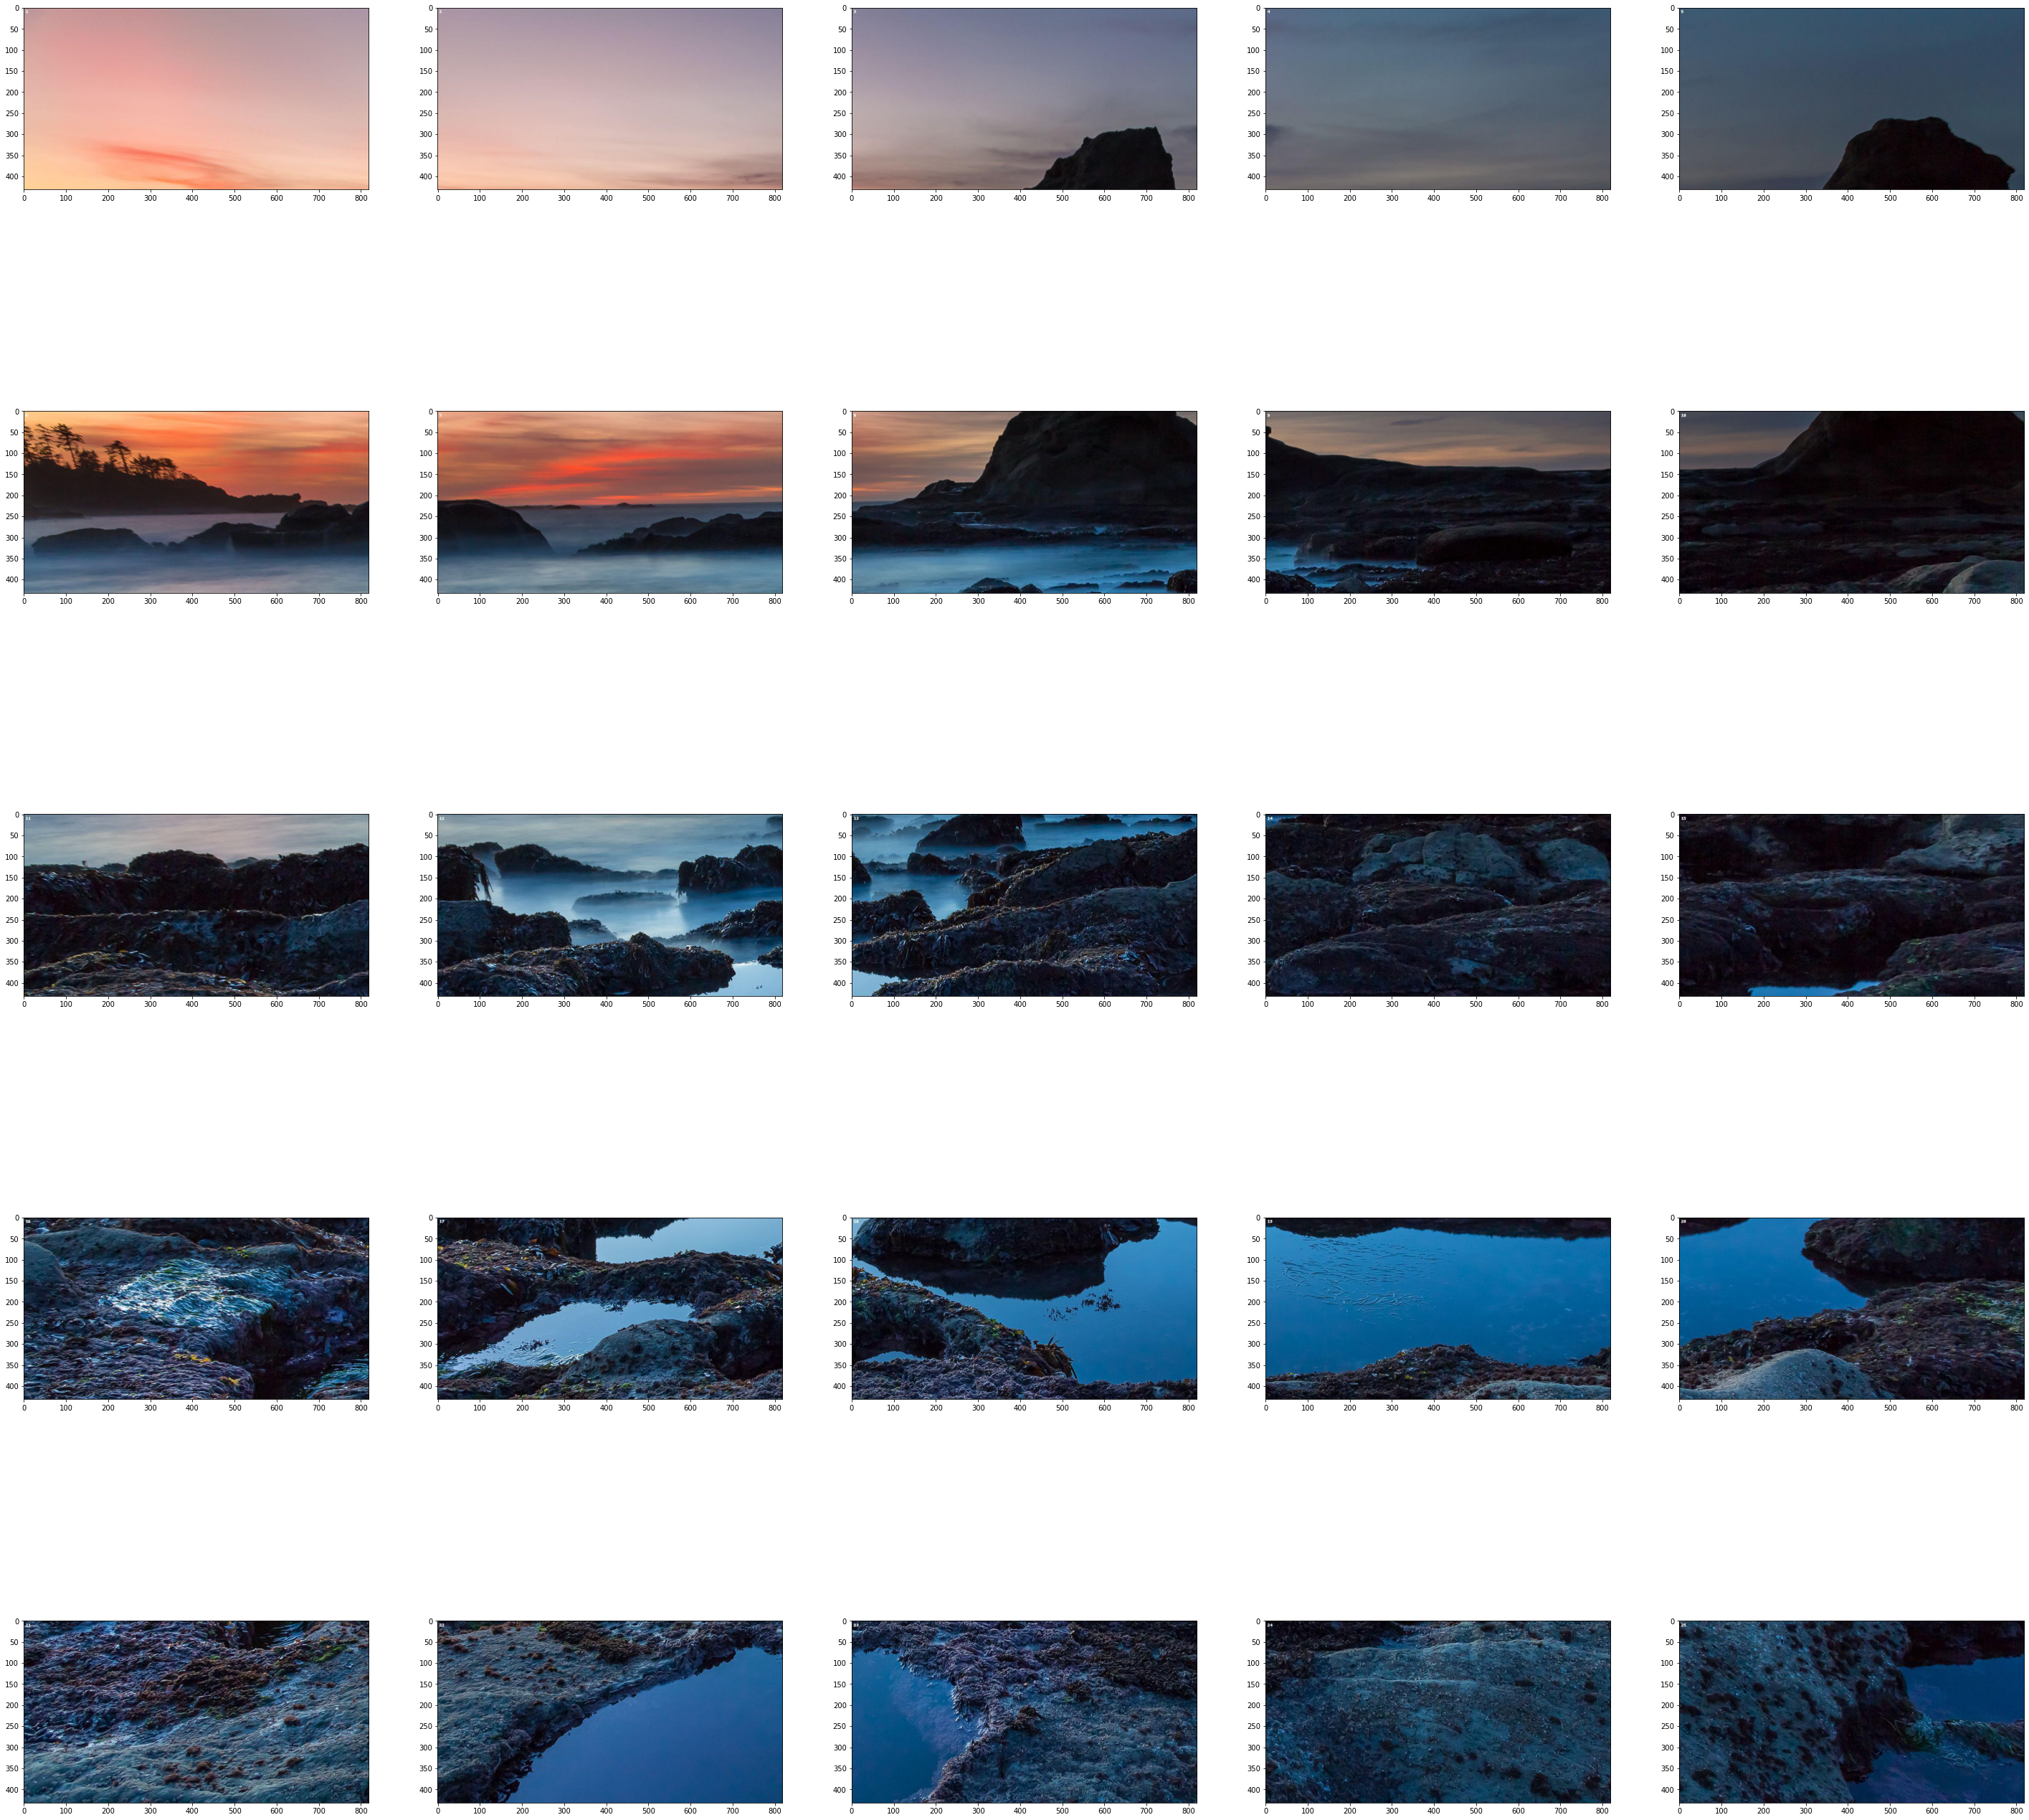

In [ ]:
_,fig=plt.subplots(5,5,figsize=(50,50))
for i in range(5):
  for j in range(5):
    #plt.figure()
    fig[i][j].imshow(im[i,j])


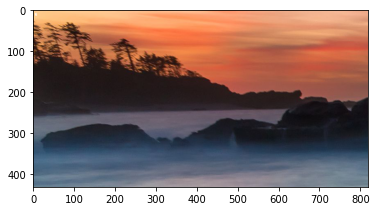

In [ ]:
#plt
plt.imshow(im[1])


In [ ]:
dsImg=cv.resize(img,(10,10))

In [ ]:
cv2_imshow(dsImg)

In [ ]:
imTensor=torch.Tensor(img).permute(2,0,1).unsqueeze(0)

In [ ]:
ipImgT=torch.nn.functional.interpolate(imTensor,200)

#High Resolution Slide Loading

In [ ]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (50.3.0)
     |████████████████████████████████| 1.5MB 7.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 8.3 MB 7.9 MB/s 
     |████████████████████████████████| 399 kB 53.5 MB/s 
     |████████████████████████████████| 151 kB 68.4 MB/s 
     |████████████████████████████████| 7.5 MB 62.6 MB/s 
     |████████████████████████████████| 911 kB 59.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 1.8 MB 51.0 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 582 kB 51.8 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 3.1 MB 33.5 MB/s 
     |████████████████████████████████| 48 kB 6.5 MB/s 
     |████████████████████████████████| 52 kB 1.0 M

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,674 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_6

In [ ]:
!pip install image_slicer

In [ ]:
import PIL
import openslide
from openslide import ImageSlide, open_slide
from openslide.deepzoom import DeepZoomGenerator
from optparse import OptionParser
import re
from unicodedata import normalize

In [ ]:
from numba import jit, cuda
import torch,torchvision
import time
import numpy as np
import cv2 as cv
from PIL import Image
from matplotlib import image
torch.cuda.is_available

<function torch.cuda.is_available>

In [ ]:
slideImg=openslide.OpenSlide('/content/drive/My Drive/Datasets/WSI/01-2461G.svs')

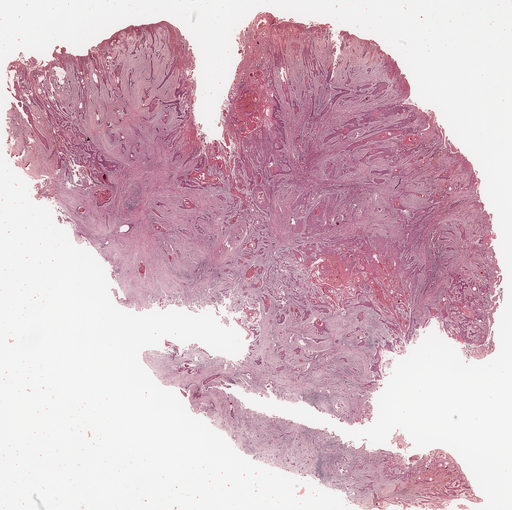

In [ ]:
slideImg.get_thumbnail((512,512))

In [ ]:
plt.imread('')

In [ ]:
@jit
def get_dim(slideImg,tile_size_M,tile_size_N):
  slideX=slideImg.dimensions[0]-slideImg.dimensions[0]%tile_size_M
  slideY=slideImg.dimensions[1]-slideImg.dimensions[1]%tile_size_N
  return [slideX,slideY]

In [ ]:
#def readImg():
 # st=time.time()
  #im=slideImg.read_region((33792,33792),0,(1024,1024))
  #print(time.time()-st)
  #return im

In [ ]:
@jit
def readImg():
  st=time.time()
  im=slideImg.read_region((34816,34816),0,(1024,1024))
  print(time.time()-st)
  return im

In [ ]:
import numba

In [ ]:

readImg()

In [ ]:
@jit
def slice(slideImg,tile_size,size):
  #print(slideX,slideY)
  M=tile_size[0]
  N=tile_size[1]
  X=size[0]
  Y=size[1]
  start_time=time.time()
  tiles = [slideImg.read_region((x,y),0,(M,N)) for x in range(0,X,M) for y in range(0,Y,N)]
  print(time.time()-start_time)
  return tiles

In [ ]:
@jit
def slice(slideImg,tile_size,size):
  #print(slideX,slideY)
  M=tile_size[0]
  N=tile_size[1]
  X=size[0]
  Y=size[1]
  start_time=time.time()
  for x in range(0,X,M):
    for y in range(0,Y,N):
      tileIm=slideImg.read_region((x,y),0,(M,N))
      savefile(tileIm,x,y,'png')
  print(time.time()-start_time)
  

In [ ]:
def savefile(image,xCord,yCord,format):
  if not os.path.exists('/content/drive/My Drive/Datasets/WSI/01_tiles/'):
    os.mkdir('/content/drive/My Drive/Datasets/WSI/01_tiles/')
  fname=f'/content/drive/My Drive/Datasets/WSI/01_tiles/{xCord}_{yCord}.png'
  image.save(fname,format)

In [ ]:
import os

In [ ]:
_,S=get_dim(slideImg,1024,1024)
S

35840

In [ ]:
import shutil
shutil.rmtree('/content/drive/My Drive/Datasets/WSI/01_tiles/', ignore_errors=True)

In [ ]:
os.mkdir('/content/drive/My Drive/Datasets/WSI/01_tiles/')

In [ ]:
len(os.listdir('/content/drive/My Drive/Datasets/WSI/01_tiles/'))

276

In [ ]:
M=1024
#S=8192
_,S=get_dim(slideImg,M,M)
print(S)
slice(slideImg,[M,M],[S,S])

35840


<ipython-input-73-7adf6ddbbd7c>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "slice" failed type inference due to: Untyped global name 'savefile': cannot determine Numba type of <class 'function'>

File "<ipython-input-73-7adf6ddbbd7c>", line 12:
def slice(slideImg,tile_size,size):
    <source elided>
      tileIm=slideImg.read_region((x,y),0,(M,N))
      savefile(tileIm,x,y,'png')
      ^

  @jit
<ipython-input-73-7adf6ddbbd7c>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "slice" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-73-7adf6ddbbd7c>", line 9:
def slice(slideImg,tile_size,size):
    <source elided>
  start_time=time.time()
  for x in range(0,X,M):
  ^

  @jit
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "slice" was compiled in object mod

1765.715927362442


In [ ]:
im=tiles[59]

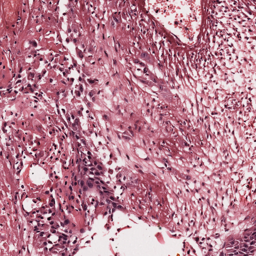

In [ ]:
newIm=im.resize((256,256))
newIm

In [ ]:
testImg=slideImg.read_region((0,0),0,(256,256))

In [ ]:
testImg.save('/content/testImg.png','png')

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

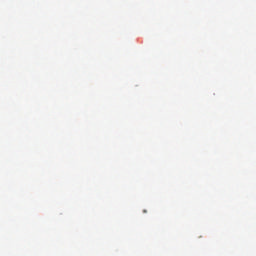

In [ ]:
cv2_imshow(cv.imread('/content/testImg.png'))

In [ ]:
len(tiles2)

19600

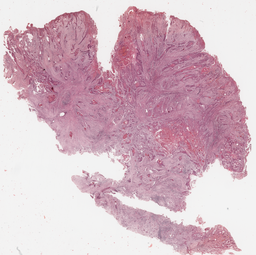

In [ ]:
slideImg.get_thumbnail((256,256))

In [ ]:
tiles2[0]

NameError: ignored

In [ ]:
tiles[0]

NameError: ignored

In [ ]:
tiles2Tensor=[]
for x in tiles2:
  tiles2Tensor.append(torch.Tensor(x))

TypeError: ignored

In [ ]:
len(tiles)

4096

In [ ]:
print(slideImg.properties.items)

<bound method Mapping.items of <_PropertyMap {'aperio.AppMag': '20', 'aperio.DSR ID': 'dentalmicroscopy', 'aperio.Date': '06/14/19', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '3452', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '3452', 'aperio.Left': '18.490810', 'aperio.LineAreaXOffset': '0.025143', 'aperio.LineAreaYOffset': '-0.017531', 'aperio.LineCameraSkew': '-0.000372', 'aperio.MPP': '0.4952', 'aperio.OriginalHeight': '35944', 'aperio.OriginalWidth': '36800', 'aperio.Parmset': 'COVERSLIP', 'aperio.ScanScope ID': 'SS5479', 'aperio.StripeWidth': '1840', 'aperio.Time': '12:12:18', 'aperio.Time Zone': 'GMT+01:00', 'aperio.Top': '20.675295', 'aperio.User': '682f95f8-d799-48f7-8322-f988d3c808a0', 'openslide.comment': 'Aperio Image Library v12.0.11 \r\n36800x35944 [0,100 35999x35844] (240x240) JPEG/RGB Q=70|AppMag = 20|StripeWidth = 1840|ScanScope ID = SS5479|Filename 

In [ ]:
len(tiles)

4096

In [ ]:
#WSI_DIRECTORY='/content/drive/My Drive/Datasets/WSI/01-2461G.svs'

#Annotation Slicing


In [ ]:
import matplotlib.pyplot as plt
import numpy as  np
from matplotlib import image
import cv2 as cv

In [ ]:


annt=np.zeros((35999,35844),dtype=np.bool)


In [ ]:
mask=np.logical_or(image.imread('/content/01-2461G-labels2.png'),annt)